ML Function
Random Forest
Multi Layer Perceptron
Support Vector Classifier
KNN


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import neighbors
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
from subprocess import call

def ML(X_train, X_test, Y_train, Y_test):
    print('Random Forest')
    RFclassifier = RandomForestClassifier(n_estimators=100)
    RFclassifier.fit(X_train, Y_train.ravel())
    Y_Pred_RF = RFclassifier.predict(X_test)
    count = 0
    M, N = X_test.shape
    print(M)
    for N in range(M):
        if Y_Pred_RF[N] == Y_test[N]:
            count = count + 1        
    print(count)
    accuracy = 0
    accuracy = count/M
    estimator = RFclassifier.estimators_[5]
    export_graphviz(estimator, out_file='tree.dot', 
                feature_names = ["mem", "temp", "tasks", "volt", "cpu"],
                class_names = ["0","1"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
    call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
    Image(filename = 'tree.png')

    print(accuracy)
    print('')
    print('')
    print('MLP')
    MLPclassifier = MLPClassifier(random_state = np.random.RandomState(), max_iter = 1000, shuffle = True)
    MLPclassifier.fit(X_train, Y_train.ravel())
    Y_Pred_MLP = MLPclassifier.predict(X_test)
    count = 0
    M, N = X_test.shape
    print(M)
    for N in range(M):
        if Y_Pred_MLP[N] == Y_test[N]:
            count = count + 1
            
    print(count)
    accuracy = 0
    accuracy = count/M
    print(accuracy)
    print('')
    print('')
    print('SVC')
    SVCclassifier = svm.SVC(gamma = 'auto')
    SVCclassifier.fit(X_train, Y_train.ravel())
    Y_Pred_SVC = SVCclassifier.predict(X_test)
    count = 0
    M, N = X_test.shape
    print(M)
    for N in range(M):
        if Y_Pred_SVC[N] == Y_test[N]:
            count = count + 1
            
    print(count)
    accuracy = 0
    accuracy = count/M
    print(accuracy)
    print('')
    print('')
    print('KNN')
    KNNclassifier = neighbors.KNeighborsClassifier()
    KNNclassifier.fit(X_train, Y_train.ravel())
    Y_Pred_KNN = KNNclassifier.predict(X_test)
    count = 0
    M, N = X_test.shape
    print(M)
    for N in range(M):
        if Y_Pred_KNN[N] == Y_test[N]:
            count = count + 1
            
    print(count)
    accuracy = 0
    accuracy = count/M
    print(accuracy)

Here I import the data sets, the Host data every 5 seconds and Netflows for each of the devices.
The labels and data have been split in preperation for being fed into the classifiers
in the NetwFlow data the start and end timestamps of each flow have been removed as I believe the ML would just use the timestamp to identify the anomolous and non-anomoulous flows. 

In [5]:
import os
import pandas as pd
import shutil
import numpy as np
from sklearn.preprocessing import StandardScaler


def DataProcess(path):
    HostDataFiles = os.listdir(path + "/HostData-5s")
    NetFlowFiles = os.listdir(path + "/NetFlow")
    Host = pd.DataFrame([])
    NetFlow = pd.DataFrame([])
    for j in HostDataFiles:
        df = pd.read_csv(path+ "/HostData-5s/" + j)  
        df = df[["mem", "temp", "time", "tasks", "volt", "cpu", "Label"]]
        del df['time'] 
        df = df[['Label'] + [c for c in df if c not in ['Label']]]
        Host = Host.append(df)
    for j in NetFlowFiles:
        df = pd.read_csv(path + "/NetFlow/" + j, index_col=0 )    
        del df['ts']
        del df['te']
        df = df[['Label'] + [c for c in df if c not in ['Label']]]
        NetFlow = NetFlow.append(df)
    HostLabel = np.array(Host.iloc[:, :1])
    NetFlowLabel = np.array(NetFlow.iloc[:, :1])
    scaler = StandardScaler()
    HostData = np.array(Host.iloc[:, 1:])
    da = np.array(HostData)
    Host = scaler.fit_transform(HostData)
    NetFlowData = np.array(NetFlow.iloc[:, 1:])  
    return HostLabel, NetFlowLabel, HostData, NetFlowData


MC Data

In [6]:
from sklearn.model_selection import train_test_split

HostTargets, NetFlowTargets, HostInputs, NetFlowInputs = DataProcess("C:/Users/james/Downloads/MC/MC")

print(HostInputs)

X_train, X_test, Y_train, Y_test = train_test_split(HostInputs, HostTargets, test_size=0.25, random_state=42, shuffle=True)

[[1.64324e+05 5.32000e+01 1.73000e+02 1.20000e+00 1.52000e+01]
 [1.64300e+05 5.26000e+01 1.73000e+02 1.20000e+00 1.47000e+01]
 [2.29336e+05 5.53000e+01 1.79000e+02 1.23130e+00 1.51000e+01]
 ...
 [4.29192e+05 5.75000e+01 1.80000e+02 1.20000e+00 2.06000e+01]
 [4.29656e+05 5.80000e+01 1.80000e+02 1.21250e+00 2.06000e+01]
 [4.29376e+05 5.69000e+01 1.80000e+02 1.20000e+00 2.06000e+01]]


MC Host classifier Tests

In [11]:
ML(X_train, X_test, Y_train, Y_test)

Random Forest
653
652


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
import sklearn.cluster
import sklearn.datasets
import sklearn.decomposition
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(HostInputs)
colors = ListedColormap(['g','r'])
classes = [0,1]
plt.figure()
scatter = plt.scatter(compressed[:,0], compressed[:,1], c=HostTargets, cmap=colors, s=4)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("PCA projection")
plt.show()



SC Data

In [ ]:
from sklearn.model_selection import train_test_split

HostTargets, NetFlowTargets, HostInputs, NetFlowInputs = DataProcess("C:/Users/james/Downloads/SC/SC")

X_train, X_test, Y_train, Y_test = train_test_split(HostInputs, HostTargets, test_size=0.25, random_state=42, shuffle=True)

SC Host Classifier Tests

In [ ]:
ML(X_train, X_test, Y_train, Y_test)

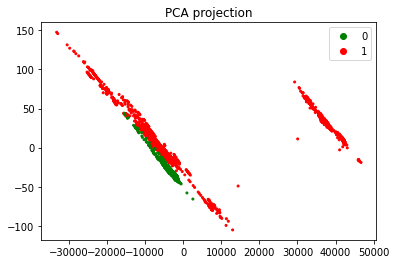

In [ ]:
import sklearn.cluster
import sklearn.datasets
import sklearn.decomposition
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(HostInputs)
colors = ListedColormap(['g','r'])
classes = [0,1]
plt.figure()
scatter = plt.scatter(compressed[:,0], compressed[:,1], c=HostTargets, cmap=colors, s=4)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("PCA projection")
plt.show()



ST Data

In [ ]:
from sklearn.model_selection import train_test_split

HostTargets, NetFlowTargets, HostInputs, NetFlowInputs = DataProcess("C:/Users/james/Downloads/ST/ST")

X_train, X_test, Y_train, Y_test = train_test_split(HostInputs, HostTargets, test_size=0.25, random_state=42, shuffle=True)

Host Classifier Tests

In [ ]:
ML(X_train, X_test, Y_train, Y_test)

Random Forest
682
681
0.998533724340176


MLP
682
517
0.7580645161290323


SVC
682
547
0.8020527859237536


KNN
682
615
0.9017595307917888


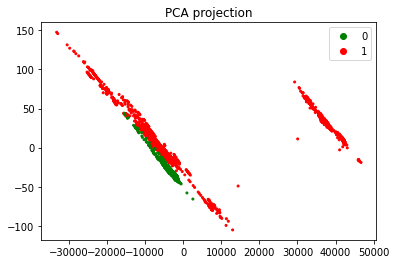

In [ ]:
import sklearn.cluster
import sklearn.datasets
import sklearn.decomposition
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(HostInputs)
colors = ListedColormap(['g','r'])
classes = [0,1]
plt.figure()
scatter = plt.scatter(compressed[:,0], compressed[:,1], c=HostTargets, cmap=colors, s=4)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("PCA projection")
plt.show()

